In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import random as rd
import math
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings


from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import LabelEncoder
from sklearn.preprocessing    import OneHotEncoder

from sklearn.linear_model     import LogisticRegression
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier
from sklearn.neural_network   import MLPClassifier


from sklearn.metrics          import confusion_matrix
from sklearn.metrics          import f1_score
from sklearn.metrics          import roc_auc_score
from sklearn.metrics          import roc_curve
from sklearn.metrics          import auc
from sklearn.metrics          import make_scorer

from sklearn.model_selection  import GridSearchCV

from imblearn.over_sampling   import SMOTE

Leemos el excel con los datos de las notas en el examen previo a la universidad, las cuales utilizaremos como variables para predecir. Estudiamos un poco el dataset, con sus columnas, valores, valores repetidos...

In [13]:
df_alumno_exito = pd.read_excel("./df_alumno_exito.xlsx",header =0)

In [16]:
df_alumno_exito

,PROGRAMA,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,PUNTAJE GLOBAL,CIENCIAS NATURALES,SOCIALES Y CIUDADANAS,LECTURA CRÍTICA,HISTORIA,GEOGRAFÍA,RAZONAMIENTO CUANTITATIVO,COMPETENCIAS CIUDADANAS,NOTA_UNI
0,Ingeniería Mecatrónica,57,66,59,61,41,53,74,58,NP,NP,NP,NP,NP,NP,NP,NP,1
1,Derecho,51,NP,NP,NP,NP,NP,39,NP,241,51,44,58,NP,NP,NP,NP,1
2,Contaduría Pública,76,NP,NP,NP,NP,NP,65,NP,330,68,64,64,NP,NP,NP,NP,1
3,Ingeniería Mecatrónica,67,NP,NP,NP,NP,NP,53,NP,311,63,66,65,NP,NP,NP,NP,1
4,Nutrición y Dietética,53,NP,NP,NP,NP,NP,53,NP,271,56,52,56,NP,NP,NP,NP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,Licenciatura en Educación Básica Primaria,38,NP,NP,NP,NP,NP,34,NP,193,37,36,48,NP,NP,NP,NP,1
3858,Licenciatura en Educación Básica Primaria,29,36,45,46,39,NP,42,47,NP,NP,NP,NP,39,42,NP,NP,1
3859,Enfermería,59,NP,NP,NP,NP,NP,65,NP,338,75,59,74,NP,NP,NP,NP,1
3860,Licenciatura en Educación Básica Primaria,52.08,60.57,59.52,44.42,53.93,58.08,63.02,56.41,NP,NP,NP,NP,NP,NP,NP,NP,1


In [15]:
df_alumno_exito = df_alumno_exito.drop('Unnamed: 0',axis=1)

In [17]:
lista_conteo = []
for i in df_alumno_exito['NOTA_UNI']:
    lista_conteo.append(i)
    
print("En el dataset contamos con {} elementos de buena decisión en la carrera y con {} de mala decisión".format(lista_conteo.count(1),lista_conteo.count(0)))

En el dataset contamos con 3309 elementos de buena decisión en la carrera y con 553 de mala decisión


Se observa que tenemos pocos elementos en el dataset. Además está descompensado, contamos con más elementos positivos que negativos.

# Transformaciones

#### Missing values

Estudiamos las variables, vemos cuantos valores no nulos tienen.

In [18]:
df_alumno_exito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PROGRAMA                   3862 non-null   object
 1   INGLÉS                     3827 non-null   object
 2   FÍSICA                     3862 non-null   object
 3   QUÍMICA                    3862 non-null   object
 4   BIOLOGÍA                   3862 non-null   object
 5   FILOSOFÍA                  3862 non-null   object
 6   CIENCIAS SOCIALES          3862 non-null   object
 7   MATEMÁTICAS                3836 non-null   object
 8   LENGUAJE                   3862 non-null   object
 9   PUNTAJE GLOBAL             3835 non-null   object
 10  CIENCIAS NATURALES         3835 non-null   object
 11  SOCIALES Y CIUDADANAS      3835 non-null   object
 12  LECTURA CRÍTICA            3836 non-null   object
 13  HISTORIA                   3862 non-null   object
 14  GEOGRAFÍ

Vemos que algunas columnas asociadas a asignaturas tienen un porcentaje muy bajo de valores nulos. Se entiende que esto se debe a que el alumnos estaría inscrito a la prueab pero no debió presentarse, por lo que se usará la etiqueta "NP" para rellenarlos.

In [19]:
df_alumno_exito.fillna('NP',inplace = True)

In [20]:
df_alumno_exito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PROGRAMA                   3862 non-null   object
 1   INGLÉS                     3862 non-null   object
 2   FÍSICA                     3862 non-null   object
 3   QUÍMICA                    3862 non-null   object
 4   BIOLOGÍA                   3862 non-null   object
 5   FILOSOFÍA                  3862 non-null   object
 6   CIENCIAS SOCIALES          3862 non-null   object
 7   MATEMÁTICAS                3862 non-null   object
 8   LENGUAJE                   3862 non-null   object
 9   PUNTAJE GLOBAL             3862 non-null   object
 10  CIENCIAS NATURALES         3862 non-null   object
 11  SOCIALES Y CIUDADANAS      3862 non-null   object
 12  LECTURA CRÍTICA            3862 non-null   object
 13  HISTORIA                   3862 non-null   object
 14  GEOGRAFÍ

In [21]:
df_alumno_exito.columns

Index(['PROGRAMA', 'INGLÉS', 'FÍSICA', 'QUÍMICA', 'BIOLOGÍA', 'FILOSOFÍA',
       'CIENCIAS SOCIALES', 'MATEMÁTICAS', 'LENGUAJE', 'PUNTAJE GLOBAL',
       'CIENCIAS NATURALES', 'SOCIALES Y CIUDADANAS', 'LECTURA CRÍTICA',
       'HISTORIA', 'GEOGRAFÍA', 'RAZONAMIENTO CUANTITATIVO',
       'COMPETENCIAS CIUDADANAS', 'NOTA_UNI'],
      dtype='object')

array([[<AxesSubplot:title={'center':'PROGRAMA'}>,
        <AxesSubplot:title={'center':'FÍSICA'}>,
        <AxesSubplot:title={'center':'QUÍMICA'}>,
        <AxesSubplot:title={'center':'BIOLOGÍA'}>],
       [<AxesSubplot:title={'center':'FILOSOFÍA'}>,
        <AxesSubplot:title={'center':'CIENCIAS SOCIALES'}>,
        <AxesSubplot:title={'center':'MATEMÁTICAS'}>,
        <AxesSubplot:title={'center':'LENGUAJE'}>],
       [<AxesSubplot:title={'center':'PUNTAJE GLOBAL'}>,
        <AxesSubplot:title={'center':'CIENCIAS NATURALES'}>,
        <AxesSubplot:title={'center':'SOCIALES Y CIUDADANAS'}>,
        <AxesSubplot:title={'center':'LECTURA CRÍTICA'}>],
       [<AxesSubplot:title={'center':'HISTORIA'}>,
        <AxesSubplot:title={'center':'GEOGRAFÍA'}>,
        <AxesSubplot:title={'center':'RAZONAMIENTO CUANTITATIVO'}>,
        <AxesSubplot:title={'center':'COMPETENCIAS CIUDADANAS'}>],
       [<AxesSubplot:title={'center':'NOTA_UNI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubpl

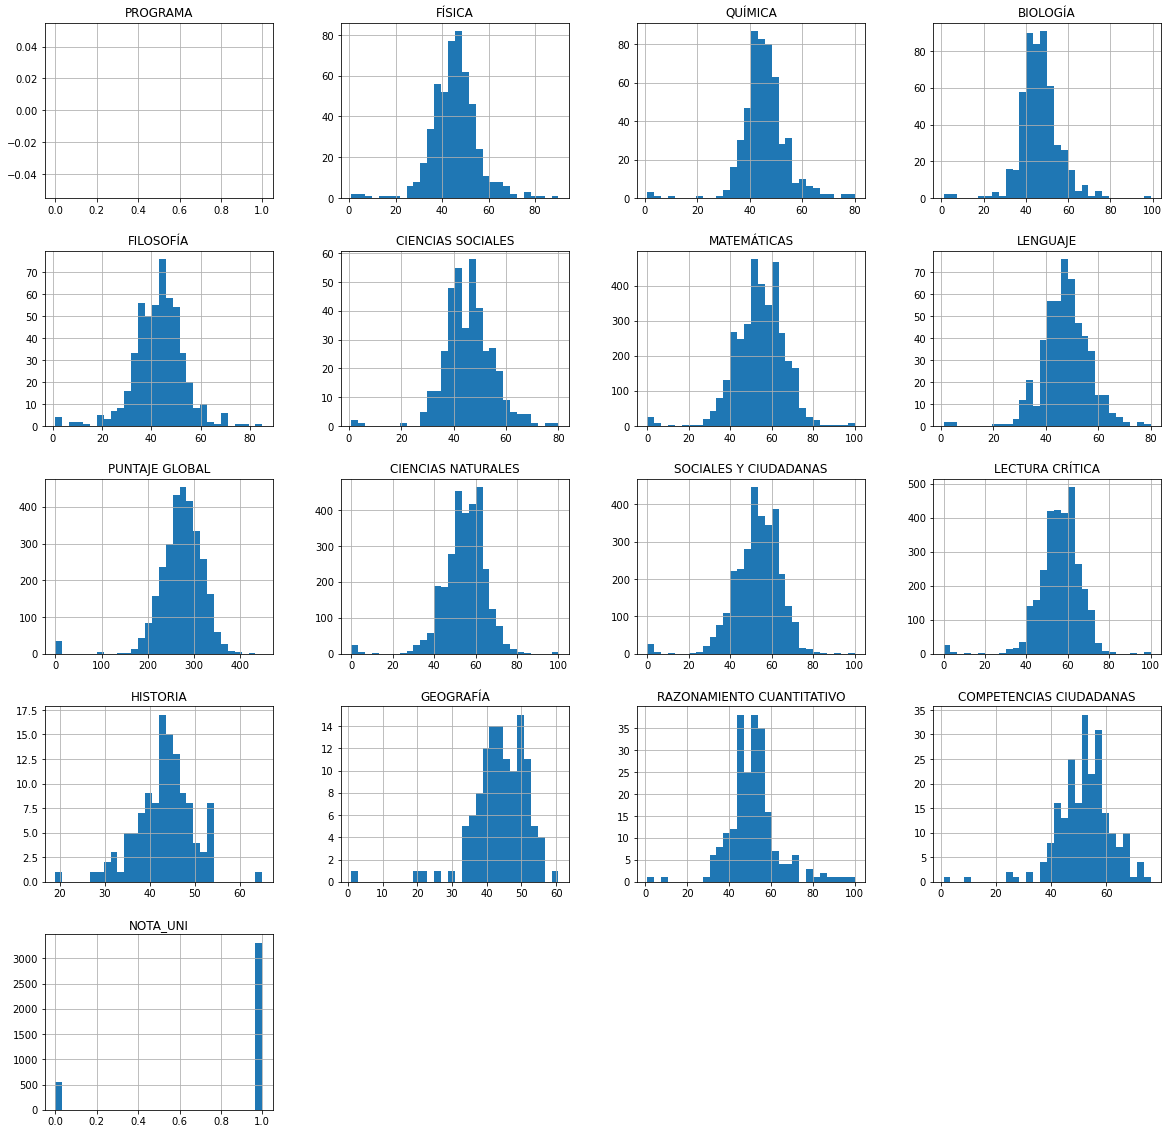

In [22]:
areas2 = np.delete(df_alumno_exito.columns,[1])

df_alumno_exito_plot = df_alumno_exito.copy()
for area in areas2:
    df_alumno_exito_plot[area] = pd.to_numeric(df_alumno_exito_plot[area], errors='coerce')

df_alumno_exito_plot.hist(bins=30,figsize=(20,20))

A continuación, dividiré las notas en distintas categorias. 

Primero sustituyo la etiqueta NP por un numero exagerado (-500) para que la columna sea numérica y pueda hacer comparaciones como < o >.

In [23]:
programas = list(df_alumno_exito.columns)
programas.remove('PROGRAMA')
programas.remove('NOTA_UNI')

In [24]:
programas

['INGLÉS',
 'FÍSICA',
 'QUÍMICA',
 'BIOLOGÍA',
 'FILOSOFÍA',
 'CIENCIAS SOCIALES',
 'MATEMÁTICAS',
 'LENGUAJE',
 'PUNTAJE GLOBAL',
 'CIENCIAS NATURALES',
 'SOCIALES Y CIUDADANAS',
 'LECTURA CRÍTICA',
 'HISTORIA',
 'GEOGRAFÍA',
 'RAZONAMIENTO CUANTITATIVO',
 'COMPETENCIAS CIUDADANAS']

In [25]:
df_alumno_exito_reset= df_alumno_exito.reset_index()
df_alumno_exito = df_alumno_exito_reset.drop('index',axis=1)

In [26]:
df_alumno_exito.replace({'NP':-500},inplace=True)

for programa in programas:
    df_alumno_exito[programa] = pd.to_numeric(df_alumno_exito[programa], errors='coerce')
    #for i in range(len(df_alumno_exito[programa])):
        #if df_alumno_exito.loc[df_alumno_exito['PROGRAMA'] == 'Ingeniería de Procesos','INGLÉS']


Luego crea una funcion para hacer un map a partir de una de las columnas, el cual creará una segunda columna con las etiquetas que será con la que nos quedaremos.

In [27]:
def etiquetar_notas (row,programa):
    if row[programa] == -500 :
        return 'NP'
    if 0 <= row[programa] < 40 :
        return 'Suspenso'
    if 40 <= row[programa] < 50 :
        return 'Aprobado'
    if 50 <= row[programa] < 60 :
        return 'Bien'
    if 60 <= row[programa] < 80 :
        return 'Notable'
    if 80 <= row[programa]:
        return 'Excelente'
    return 'NP'

In [28]:
for programa in programas:
    df_alumno_exito[programa+'2'] = df_alumno_exito.apply (lambda row: etiquetar_notas(row,programa), axis=1)

In [29]:
df_alumno_exito

,PROGRAMA,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,PUNTAJE GLOBAL,...,MATEMÁTICAS2,LENGUAJE2,PUNTAJE GLOBAL2,CIENCIAS NATURALES2,SOCIALES Y CIUDADANAS2,LECTURA CRÍTICA2,HISTORIA2,GEOGRAFÍA2,RAZONAMIENTO CUANTITATIVO2,COMPETENCIAS CIUDADANAS2
0,Ingeniería Mecatrónica,57.00,66.00,59.00,61.00,41.00,53.00,74.00,58.00,-500,...,Notable,Bien,NP,NP,NP,NP,NP,NP,NP,NP
1,Derecho,51.00,-500.00,-500.00,-500.00,-500.00,-500.00,39.00,-500.00,241,...,Suspenso,NP,Excelente,Bien,Aprobado,Bien,NP,NP,NP,NP
2,Contaduría Pública,76.00,-500.00,-500.00,-500.00,-500.00,-500.00,65.00,-500.00,330,...,Notable,NP,Excelente,Notable,Notable,Notable,NP,NP,NP,NP
3,Ingeniería Mecatrónica,67.00,-500.00,-500.00,-500.00,-500.00,-500.00,53.00,-500.00,311,...,Bien,NP,Excelente,Notable,Notable,Notable,NP,NP,NP,NP
4,Nutrición y Dietética,53.00,-500.00,-500.00,-500.00,-500.00,-500.00,53.00,-500.00,271,...,Bien,NP,Excelente,Bien,Bien,Bien,NP,NP,NP,NP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,Licenciatura en Educación Básica Primaria,38.00,-500.00,-500.00,-500.00,-500.00,-500.00,34.00,-500.00,193,...,Suspenso,NP,Excelente,Suspenso,Suspenso,Aprobado,NP,NP,NP,NP
3858,Licenciatura en Educación Básica Primaria,29.00,36.00,45.00,46.00,39.00,-500.00,42.00,47.00,-500,...,Aprobado,Aprobado,NP,NP,NP,NP,Suspenso,Aprobado,NP,NP
3859,Enfermería,59.00,-500.00,-500.00,-500.00,-500.00,-500.00,65.00,-500.00,338,...,Notable,NP,Excelente,Notable,Bien,Notable,NP,NP,NP,NP
3860,Licenciatura en Educación Básica Primaria,52.08,60.57,59.52,44.42,53.93,58.08,63.02,56.41,-500,...,Notable,Bien,NP,NP,NP,NP,NP,NP,NP,NP


Eliminamos las columnas numéricas y nombramos con los nombres que teníamos antes a las nuevas.

In [30]:
df_alumno_exito = df_alumno_exito.drop(programas,axis=1)

In [31]:
dicc_programas = {}
for programa in programas:
    dicc_programas[programa+'2'] = programa
    
df_alumno_exito.rename(columns = dicc_programas,inplace = True)

In [32]:
print("Valores únicos de los distintos programas")
for programa in programas:
    print("{}:\n    {}".format(programa,df_alumno_exito[programa].unique()))

Valores únicos de los distintos programas
INGLÉS:
    ['Bien' 'Notable' 'Aprobado' 'NP' 'Suspenso' 'Excelente']
FÍSICA:
    ['Notable' 'NP' 'Bien' 'Aprobado' 'Suspenso' 'Excelente']
QUÍMICA:
    ['Bien' 'NP' 'Aprobado' 'Suspenso' 'Notable' 'Excelente']
BIOLOGÍA:
    ['Notable' 'NP' 'Aprobado' 'Suspenso' 'Bien' 'Excelente']
FILOSOFÍA:
    ['Aprobado' 'NP' 'Suspenso' 'Bien' 'Notable' 'Excelente']
CIENCIAS SOCIALES:
    ['Bien' 'NP' 'Suspenso' 'Aprobado' 'Notable' 'Excelente']
MATEMÁTICAS:
    ['Notable' 'Suspenso' 'Bien' 'Aprobado' 'NP' 'Excelente']
LENGUAJE:
    ['Bien' 'NP' 'Aprobado' 'Suspenso' 'Notable' 'Excelente']
PUNTAJE GLOBAL:
    ['NP' 'Excelente' 'Suspenso' 'Aprobado' 'Notable']
CIENCIAS NATURALES:
    ['NP' 'Bien' 'Notable' 'Aprobado' 'Suspenso' 'Excelente']
SOCIALES Y CIUDADANAS:
    ['NP' 'Aprobado' 'Notable' 'Bien' 'Suspenso' 'Excelente']
LECTURA CRÍTICA:
    ['NP' 'Bien' 'Notable' 'Aprobado' 'Suspenso' 'Excelente']
HISTORIA:
    ['NP' 'Aprobado' 'Suspenso' 'Bien' 'Notable

<AxesSubplot:>

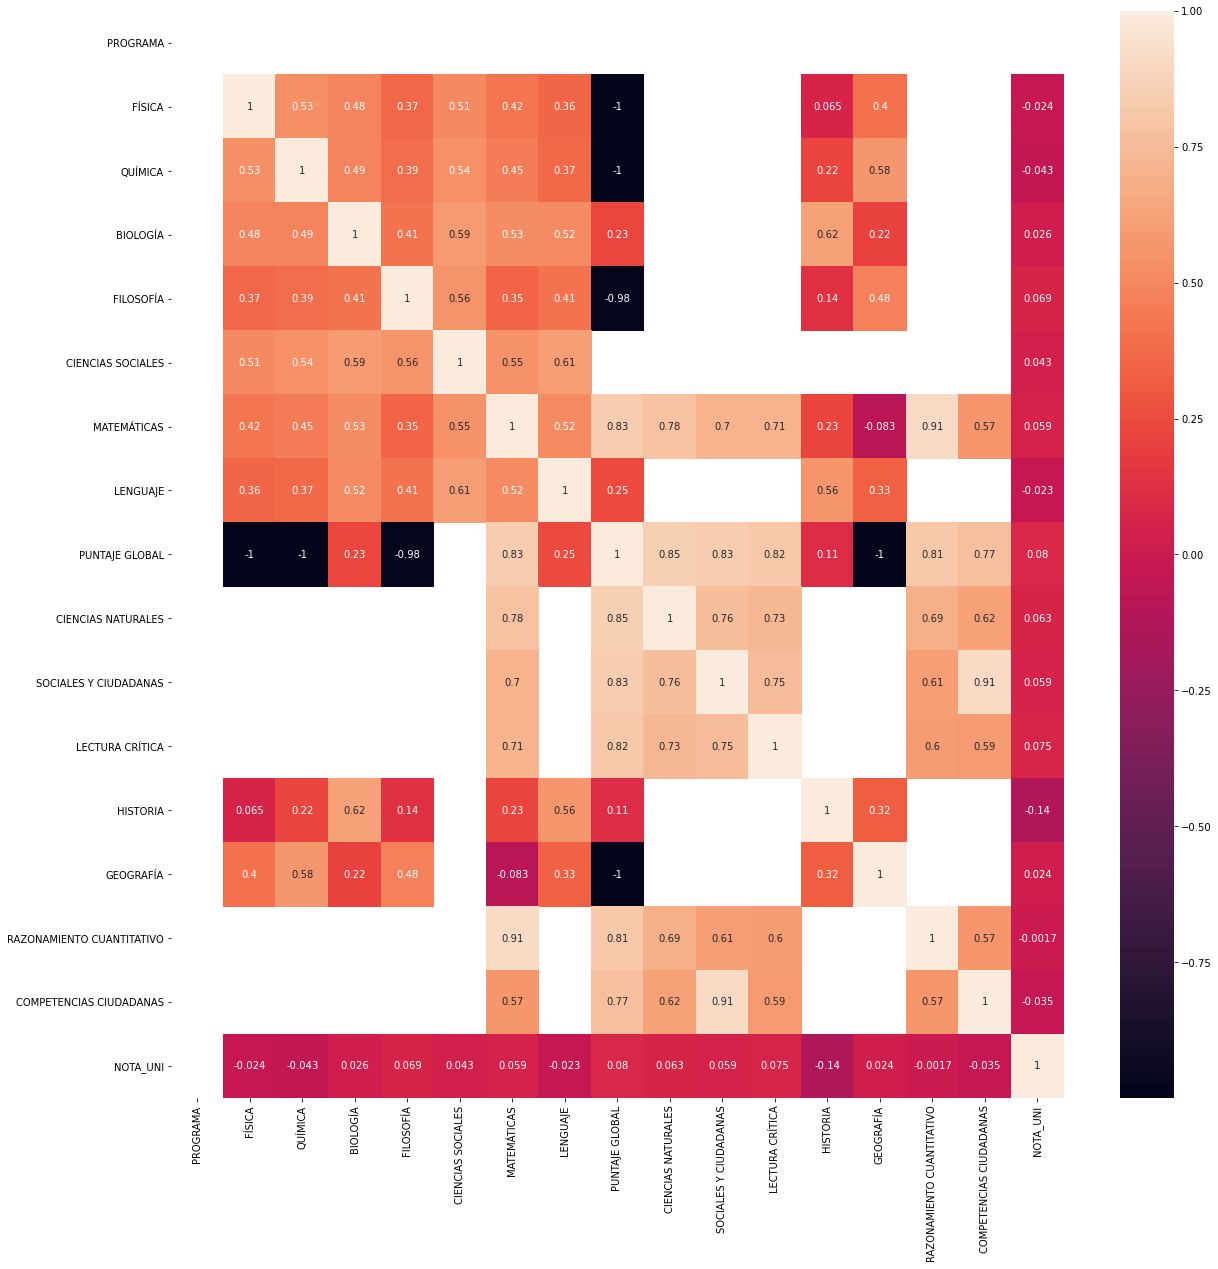

In [33]:
correlation = df_alumno_exito_plot.corr()
f, ax = plt.subplots(figsize = [20,20])
sns.heatmap(correlation,annot=True)

Suponemos que puntaje global es la suma de los demás valores (o una fórmula similar), por lo que podemos eliminarla ya que no nos aporta ninguna información nueva.

In [34]:
df_alumno_exito = df_alumno_exito.drop('PUNTAJE GLOBAL',axis=1)

In [35]:
df_alumno_exito

,PROGRAMA,NOTA_UNI,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,CIENCIAS NATURALES,SOCIALES Y CIUDADANAS,LECTURA CRÍTICA,HISTORIA,GEOGRAFÍA,RAZONAMIENTO CUANTITATIVO,COMPETENCIAS CIUDADANAS
0,Ingeniería Mecatrónica,1,Bien,Notable,Bien,Notable,Aprobado,Bien,Notable,Bien,NP,NP,NP,NP,NP,NP,NP
1,Derecho,1,Bien,NP,NP,NP,NP,NP,Suspenso,NP,Bien,Aprobado,Bien,NP,NP,NP,NP
2,Contaduría Pública,1,Notable,NP,NP,NP,NP,NP,Notable,NP,Notable,Notable,Notable,NP,NP,NP,NP
3,Ingeniería Mecatrónica,1,Notable,NP,NP,NP,NP,NP,Bien,NP,Notable,Notable,Notable,NP,NP,NP,NP
4,Nutrición y Dietética,1,Bien,NP,NP,NP,NP,NP,Bien,NP,Bien,Bien,Bien,NP,NP,NP,NP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,Licenciatura en Educación Básica Primaria,1,Suspenso,NP,NP,NP,NP,NP,Suspenso,NP,Suspenso,Suspenso,Aprobado,NP,NP,NP,NP
3858,Licenciatura en Educación Básica Primaria,1,Suspenso,Suspenso,Aprobado,Aprobado,Suspenso,NP,Aprobado,Aprobado,NP,NP,NP,Suspenso,Aprobado,NP,NP
3859,Enfermería,1,Bien,NP,NP,NP,NP,NP,Notable,NP,Notable,Bien,Notable,NP,NP,NP,NP
3860,Licenciatura en Educación Básica Primaria,1,Bien,Notable,Bien,Aprobado,Bien,Bien,Notable,Bien,NP,NP,NP,NP,NP,NP,NP


In [36]:
df_alumno0 = df_alumno_exito[df_alumno_exito['NOTA_UNI'] == 0]
df_alumno1 = df_alumno_exito[df_alumno_exito['NOTA_UNI'] == 1]

In [37]:
print(len(df_alumno_exito))
print(len(df_alumno0))
print(len(df_alumno1))

3862
553
3309


La formula es el 10% del dataframe total (0.1 *len(df_alumno_exito)) tiene que ser igual al nuevo porcentaje del dataframe de 1s (por_relativo* len(df_alumno1))

In [38]:
#Queremos encontrar el porcentaje relativo para hacer la división en el dataframe con todos los casos de éxito
#de manera que se obtengan el mismo número de valores que el 10% del dataset total.
por_relativo = (0.1 *len(df_alumno_exito) )/len(df_alumno1)
por_relativo

0.11671199758235118

Separamos el dataset en train y test, donde demomento solo nos interesa dejar bien el test.

In [39]:
df_alumno1_reset= df_alumno1.reset_index()
df_alumno1 = df_alumno1_reset.drop('index',axis=1)

In [40]:
y = df_alumno1['PROGRAMA']
df_alumno1 = df_alumno1.drop('PROGRAMA',axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_alumno1, y, test_size=por_relativo, random_state=42)

Le devolvemos la columna programa al X_train porque lo necesitaremos para hacer la partición según las carreras más adelante. Además, le concatenamos el dataset con los valores 0.

In [42]:
X_train['PROGRAMA'] = y_train

In [43]:
X_train_global = pd.concat([X_train,df_alumno0])

In [44]:
X_train_global

,NOTA_UNI,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,CIENCIAS NATURALES,SOCIALES Y CIUDADANAS,LECTURA CRÍTICA,HISTORIA,GEOGRAFÍA,RAZONAMIENTO CUANTITATIVO,COMPETENCIAS CIUDADANAS,PROGRAMA
1289,1,Suspenso,Bien,Aprobado,Aprobado,Notable,Bien,Aprobado,Bien,NP,NP,NP,NP,NP,NP,NP,Tecnología en Regencia de Farmacia
246,1,Bien,NP,NP,NP,NP,NP,Notable,NP,Notable,Notable,Notable,NP,NP,NP,NP,Derecho
507,1,Notable,NP,NP,NP,NP,NP,Notable,NP,Bien,Bien,Bien,NP,NP,NP,NP,Fisioterapia
805,1,Aprobado,NP,NP,NP,NP,NP,Aprobado,NP,Suspenso,Suspenso,Aprobado,NP,NP,Aprobado,Suspenso,Tecnología en Regencia de Farmacia
1582,1,Aprobado,NP,NP,NP,NP,NP,Suspenso,NP,Suspenso,Suspenso,Suspenso,NP,NP,NP,NP,Derecho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,0,Aprobado,NP,NP,NP,NP,NP,Aprobado,NP,Aprobado,Aprobado,Aprobado,NP,NP,NP,NP,Comunicación Social
3848,0,Bien,NP,NP,NP,NP,NP,Notable,NP,Notable,Aprobado,Notable,NP,NP,NP,NP,Ingeniería Ambiental
3851,0,Notable,NP,NP,NP,NP,NP,Notable,NP,Notable,Notable,Bien,NP,NP,NP,NP,Ingeniería de Sistemas
3852,0,Bien,NP,NP,NP,NP,NP,Notable,NP,Notable,Notable,Bien,NP,NP,NP,NP,Ingeniería Civil


Eliminamos del test la nota de la universidad y ahora y de esta manera ya lo tenemos preparado para darselo al algoritmo global

In [45]:
X_test = X_test.drop('NOTA_UNI',axis=1)

In [46]:
X_test

,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,CIENCIAS NATURALES,SOCIALES Y CIUDADANAS,LECTURA CRÍTICA,HISTORIA,GEOGRAFÍA,RAZONAMIENTO CUANTITATIVO,COMPETENCIAS CIUDADANAS
52,Notable,NP,NP,NP,NP,NP,Bien,NP,Bien,Notable,Notable,NP,NP,NP,NP
680,Aprobado,NP,NP,NP,NP,NP,Notable,NP,Aprobado,Bien,Bien,NP,NP,NP,NP
1376,Bien,NP,NP,NP,NP,NP,Aprobado,NP,Aprobado,Suspenso,Aprobado,NP,NP,NP,NP
1237,Bien,NP,NP,NP,NP,NP,Bien,NP,Bien,Bien,Bien,NP,NP,Aprobado,Bien
203,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,Notable,NP,NP,NP,NP,NP,Notable,NP,Notable,Notable,Notable,NP,NP,NP,NP
1446,Aprobado,NP,NP,NP,NP,NP,Notable,NP,Bien,Bien,Notable,NP,NP,NP,NP
2053,Bien,NP,NP,NP,NP,NP,Bien,NP,Bien,Aprobado,Notable,NP,NP,NP,NP
324,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP


In [47]:
Nota_uni = list(X_train_global['NOTA_UNI'])
print(len(Nota_uni))
print(np.isnan(Nota_uni).sum())
programas_df = list(X_train_global['PROGRAMA'])
print(len(programas_df))
X_train_global = X_train_global.drop(['NOTA_UNI','PROGRAMA'],axis=1)

columns = X_train_global.columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = encoder.fit_transform(X_train_global[columns]).toarray()
X_train_global = pd.DataFrame(encoded_cols)
X_train_global['NOTA_UNI'] = Nota_uni
X_train_global['PROGRAMA'] = programas_df 
    
encoded_cols_test = encoder.transform(X_test[columns]).toarray()
X_test = pd.DataFrame(encoded_cols_test)

3475
0
3475


A continuación voy a dividir el dataframe X_train en las distintas carreras.

In [48]:
carreras = X_train_global['PROGRAMA'].unique()

In [49]:
dicc = {}
for carrera in carreras:
    dicc["{}".format(carrera)] = X_train_global[X_train_global['PROGRAMA'] == carrera]

Estudiamos el número de elementos por dataframe, con su número de suspensos y aprobados.

In [50]:
for key in dicc:
    lista_conteo2 = list(dicc[key]['NOTA_UNI'])
    aprovados     = lista_conteo2.count(1)
    suspendidos   = lista_conteo2.count(0)
    print("{} \ntiene {} elementos: \n       {} aprovados     {} suspendidos.\n".format(key,len(dicc[key]),aprovados,suspendidos))

Tecnología en Regencia de Farmacia 
tiene 145 elementos: 
       135 aprovados     10 suspendidos.

Derecho 
tiene 324 elementos: 
       269 aprovados     55 suspendidos.

Fisioterapia 
tiene 149 elementos: 
       134 aprovados     15 suspendidos.

Ingeniería Mecatrónica 
tiene 141 elementos: 
       108 aprovados     33 suspendidos.

Contaduría Pública 
tiene 182 elementos: 
       143 aprovados     39 suspendidos.

Tecnología en Radiodiagnóstico y Radioterapia 
tiene 156 elementos: 
       127 aprovados     29 suspendidos.

Ingeniería Civil 
tiene 208 elementos: 
       183 aprovados     25 suspendidos.

Trabajo Social 
tiene 147 elementos: 
       137 aprovados     10 suspendidos.

Ingeniería Ambiental 
tiene 149 elementos: 
       113 aprovados     36 suspendidos.

Enfermería 
tiene 180 elementos: 
       169 aprovados     11 suspendidos.

Nutrición y Dietética 
tiene 152 elementos: 
       146 aprovados     6 suspendidos.

Ingeniería de Procesos 
tiene 54 elementos: 
       42 a

Eliminamos de cada uno de las dataframe la columna programa, pues ya no nos aporta ninguna información.

In [51]:
for key in dicc:
    dicc[key] = dicc[key].drop('PROGRAMA',axis=1)

A continuación, hacemos la partición en train y test de cada uno de los dataframes.

In [52]:
dicc['Nutrición y Dietética']

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,NOTA_UNI
19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
96,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3203,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Atenas

Primero probamos con una sola carrera para aseugrarnos de su funcionamiento

In [53]:
programa = 'Comunicación Social'
df_programa = dicc[programa]

In [54]:
y_programa = dicc[programa]['NOTA_UNI']
dicc[programa].drop('NOTA_UNI',axis=1,inplace=True)

In [55]:
dicc[programa]

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3395,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3427,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
X_train_sec,X_test_sec,y_train_sec,y_test_sec = train_test_split(dicc[programa],y_programa,test_size = 0.2, random_state=1)

In [57]:
X_train_sec

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
3020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1868,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
585,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
X_test_sec

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
1314,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1382,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3386,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2612,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
def plot_matriz(y_test,yhat):
    cm = confusion_matrix(y_test,yhat)
    sns.set(font_scale=1)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.title("Matriz de confusión")
    plt.xlabel("Valores predichos")
    plt.ylabel("Valores reales")
    plt.show
    
#plot_matriz(y_test_sec,yhat)

### Arbol

In [64]:
max_depth_list = np.array([1,2,3,4,5])
#criterion_list = np.array(["gini","entropy","log_loss"])
#splitter_list  = np.array(["best","random"])

param_grid  = dict(max_depth = max_depth_list)
modelo_grid = DecisionTreeClassifier(random_state=1)

grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring='roc_auc')
grid.fit(X_train_sec,y_train_sec)

print(f'Mejor puntuación: {grid.best_score_} para los estimadores max_depth, criterion, splitter: {grid.best_estimator_.max_depth} ')

Mejor puntuación: 0.49696969696969695 para los estimadores max_depth, criterion, splitter: 1 


AUC score: 56.154


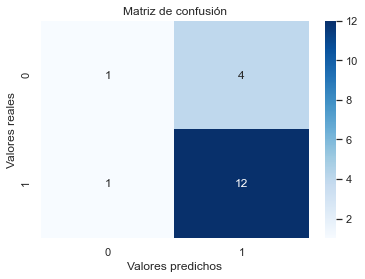

In [65]:
modelo_final_AD = DecisionTreeClassifier(max_depth = 2)
modelo_final_AD.fit(X_train_sec,y_train_sec)
yhat = modelo_final_AD.predict(X_test_sec)
accuracy_AD = roc_auc_score(y_test_sec,yhat)
print('AUC score: {:.3f}'.format(accuracy_AD*100))

plot_matriz(y_test_sec,yhat)

### Bosque

In [246]:
n_estimators_list = np.array([50,100,150,200])
max_depth_list    = np.array([1,2,3,4,5])
#criterion_list = np.array(["gini","entropy","log_loss"])
#splitter_list  = np.array(["best","random"])

param_grid  = dict(n_estimators = n_estimators_list,max_depth = max_depth_list)
modelo_grid = RandomForestClassifier(random_state=1)

grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring='roc_auc')
grid.fit(X_train_sec,y_train_sec)

print(f'Mejor puntuación: {grid.best_score_} para los estimadores max_depth, n_estimators: {grid.best_estimator_.max_depth}, {grid.best_estimator_.n_estimators} ')

Mejor puntuación: 0.5104978354978356 para los estimadores max_depth, n_estimators: 1, 200 


AUC score: 50.000


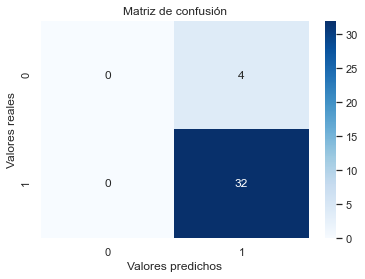

In [330]:
modelo_final_RF = RandomForestClassifier(n_estimators = 500, max_depth = 1)
modelo_final_RF.fit(X_train_sec,y_train_sec)
yhat = modelo_final_RF.predict(X_test_sec)
accuracy_RF = roc_auc_score(y_test_sec,yhat)
print('AUC score: {:.3f}'.format(accuracy_RF*100))

plot_matriz(y_test_sec,yhat)

### Red

In [210]:
warnings.filterwarnings("ignore")

activation_list = np.array(['identity','logistic','tanh','relu'])
solver_list = np.array(["lbfgs","sgd","adam"])
learning_rate_init_list  = np.array([0.005,0.01,0.05,0.1])

param_grid  = dict(activation = activation_list,solver=solver_list,learning_rate_init=learning_rate_init_list)
modelo_grid = MLPClassifier(random_state=1,max_iter=1000)

grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring='roc_auc')
grid.fit(X_train_sec,y_train_sec)

print(f'Mejor puntuación: {grid.best_score_} para los estimadores max_depth, criterion, splitter: {grid.best_estimator_.activation},{grid.best_estimator_.solver},{grid.best_estimator_.learning_rate_init} ')

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_netwo

Mejor puntuación: 0.6115441176470588 para los estimadores max_depth, criterion, splitter: relu,adam,0.01 


AUC score: 52.308


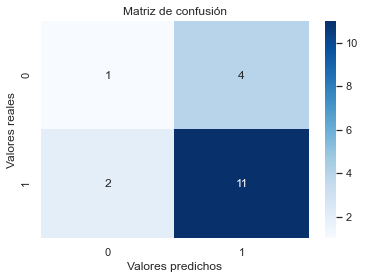

In [344]:
modelo_final_RN = MLPClassifier(activation = 'logistic',solver='adam',learning_rate_init=0.01)
modelo_final_RN.fit(X_train_sec,y_train_sec)
yhat = modelo_final_RN.predict(X_test_sec)
accuracy_RN = roc_auc_score(y_test_sec,yhat)
print('AUC score: {:.3f}'.format(accuracy_RN*100))

plot_matriz(y_test_sec,yhat)

In [148]:
if accuracy_AD >= accuracy_RF:
    if accuracy_AD >= accuracy_RN:
        modelo_final = modelo_final_AD
        print("Se ha escogido el modelo Arbol de Decisión")

    elif accuracy_AD < accuracy_RN:
        modelo_final = modelo_final_RN
        print("Se ha escogido el modelo Red Neuronas")
        
elif accuracy_RF > accuracy_AD:
    if accuracy_RF >= accuracy_RN:
        modelo_final = modelo_final_RF
        print("Se ha escogido el modelo Random Forest")
        
    elif accuracy_RF < accuracy_RN:
        modelo_final = modelo_final_RN
        print("Se ha escogido el modelo Red Neuronas")

filename = programa+'.sav'
joblib.dump(modelo_final, filename)

Se ha escogido el modelo Red Neuronas


['Licenciatura en Educación Básica Primaria.sav']

In [205]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_sec, y_test_sec)
print(result)

0.6593406593406593


In [206]:
result = modelo_final_RN.score(X_test_sec, y_test_sec)
print(result)

0.6593406593406593


Una vez se ha comprobado el funcionamiento del algorito para una carrera, ya se pueden generalizar las funicones para crear el algoritmo final que entrene todos los subalgoritmos.

In [118]:
def preparar_dataframes(dicc,programa,y_programa):
    X_train_sec,X_test_sec,y_train_sec,y_test_sec = train_test_split(dicc[programa],y_programa,test_size = 0.2, random_state=1)
        
    return X_train_sec,X_test_sec,y_train_sec,y_test_sec

In [119]:
def modelo_RF(X_train_sec,y_train_sec,X_test_sec,y_test_sec):
    max_depth_list = np.array([1,2,3,4,5])
    n_estimators_list = np.array([50,100,150,200])

    param_grid  = dict(n_estimators = n_estimators_list,max_depth = max_depth_list)
    modelo_grid = RandomForestClassifier(random_state=1)

    grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring='roc_auc')
    grid.fit(X_train_sec,y_train_sec)
    
    modelo_final_RF = RandomForestClassifier(random_state=1,max_depth = grid.best_estimator_.max_depth,n_estimators = grid.best_estimator_.n_estimators)
    modelo_final_RF.fit(X_train_sec,y_train_sec)
    yhat = modelo_final_RF.predict(X_test_sec)
    accuracy_RF = roc_auc_score(y_test_sec,yhat)
    
    return modelo_final_RF,accuracy_RF

In [120]:
def modelo_AD(X_train_sec,y_train_sec,X_test_sec,y_test_sec):
    max_depth_list    = np.array([1,2,3,4,5])

    param_grid  = dict(max_depth = max_depth_list)
    modelo_grid = DecisionTreeClassifier(random_state=1)

    grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring='roc_auc')
    grid.fit(X_train_sec,y_train_sec)
    
    modelo_final_AD = DecisionTreeClassifier(random_state=1,max_depth = grid.best_estimator_.max_depth)
    modelo_final_AD.fit(X_train_sec,y_train_sec)
    yhat = modelo_final_AD.predict(X_test_sec)
    accuracy_AD = roc_auc_score(y_test_sec,yhat)
    
    return modelo_final_AD,accuracy_AD

In [121]:
def modelo_RN(X_train_sec,y_train_sec,X_test_sec,y_test_sec):
    activation_list = np.array(['identity','logistic','tanh','relu'])
    solver_list = np.array(["lbfgs","sgd","adam"])
    learning_rate_init_list  = np.array([0.005,0.01,0.05,0.1])

    param_grid  = dict(activation = activation_list,solver=solver_list,learning_rate_init=learning_rate_init_list)
    modelo_grid = MLPClassifier(random_state=1)

    grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring='roc_auc')
    grid.fit(X_train_sec,y_train_sec)
    
    modelo_final_RN = MLPClassifier(random_state=1,activation = grid.best_estimator_.activation,solver=grid.best_estimator_.solver,learning_rate_init=grid.best_estimator_.learning_rate_init)
    modelo_final_RN.fit(X_train_sec,y_train_sec)
    yhat = modelo_final_RN.predict(X_test_sec)
    accuracy_RN = roc_auc_score(y_test_sec,yhat)
    
    return modelo_final_RN,accuracy_RN

In [122]:
def escoger_algoritmo(accuracy_AD,accuracy_RF,accuracy_RN,modelo_final_AD,modelo_final_RF,modelo_final_RN):
    if accuracy_AD >= accuracy_RF:
        if accuracy_AD >= accuracy_RN:
            modelo_final = modelo_final_AD
            print("Se ha escogido el modelo Arbol de Decisión")

        elif accuracy_AD < accuracy_RN:
            modelo_final = modelo_final_RN
            print("Se ha escogido el modelo Red Neuronas")
        
    elif accuracy_RF > accuracy_AD:
        if accuracy_RF >= accuracy_RN:
            modelo_final = modelo_final_RF
            print("Se ha escogido el modelo Random Forest")
        
        elif accuracy_RF < accuracy_RN:
            modelo_final = modelo_final_RN
            print("Se ha escogido el modelo Red Neuronas")
    
    return modelo_final

Creadas las funciones, el siguiente código entrena todos los subalgoritmos del algoritmo.

In [390]:
warnings.filterwarnings("ignore")

for key in dicc:
    programa = key
    print(programa+":\n")
    df_programa = dicc[programa]
    y_programa = dicc[programa]['NOTA_UNI']
    dicc[programa].drop('NOTA_UNI',axis=1,inplace=True)
    
    X_train_sec,X_test_sec,y_train_sec,y_test_sec = preparar_dataframes(dicc,programa,y_programa)
    
    modelo_final_AD,accuracy_AD = modelo_AD(X_train_sec,y_train_sec,X_test_sec,y_test_sec)
    modelo_final_RF,accuracy_RF = modelo_RF(X_train_sec,y_train_sec,X_test_sec,y_test_sec)
    modelo_final_RN,accuracy_RN = modelo_RN(X_train_sec,y_train_sec,X_test_sec,y_test_sec)
    
    modelo_final = escoger_algoritmo(accuracy_AD,accuracy_RF,accuracy_RN,modelo_final_AD,modelo_final_RF,modelo_final_RN)
    
    filename = programa+'.sav'
    joblib.dump(modelo_final, filename)

Tecnología en Regencia de Farmacia:

Se ha escogido el modelo Random Forest
Derecho:

Se ha escogido el modelo Arbol de Decisión
Fisioterapia:

Se ha escogido el modelo Random Forest
Ingeniería Mecatrónica:

Se ha escogido el modelo Red Neuronas
Contaduría Pública:

Se ha escogido el modelo Red Neuronas
Tecnología en Radiodiagnóstico y Radioterapia:

Se ha escogido el modelo Arbol de Decisión
Ingeniería Civil:

Se ha escogido el modelo Arbol de Decisión
Trabajo Social:

Se ha escogido el modelo Random Forest
Ingeniería Ambiental:

Se ha escogido el modelo Arbol de Decisión
Enfermería:

Se ha escogido el modelo Arbol de Decisión
Nutrición y Dietética:

Se ha escogido el modelo Arbol de Decisión
Ingeniería de Procesos:

Se ha escogido el modelo Arbol de Decisión
Licenciatura en Educación Básica Primaria:

Se ha escogido el modelo Red Neuronas
Mercadeo:

Se ha escogido el modelo Arbol de Decisión
Técnico Laboral en Auxiliar en Enfermería:

Se ha escogido el modelo Random Forest
Administra

In [508]:
#Por si quiero probar para una sola carrera
'''warnings.filterwarnings("ignore")

programa = 'Licenciatura en Educación Básica Primaria'
df_programa = dicc[programa]
y_programa = dicc[programa]['NOTA_UNI']
dicc[programa].drop('NOTA_UNI',axis=1,inplace=True)
    
X_train_sec,X_test_sec,y_train_sec,y_test_sec = preparar_dataframes(dicc,programa,y_programa)
    
modelo_final_AD,accuracy_AD = modelo_AD(X_train_sec,y_train_sec,X_test_sec,y_test_sec)
modelo_final_RF,accuracy_RF = modelo_RF(X_train_sec,y_train_sec,X_test_sec,y_test_sec)
modelo_final_RN,accuracy_RN = modelo_RN(X_train_sec,y_train_sec,X_test_sec,y_test_sec)
    
modelo_final = escoger_algoritmo(accuracy_AD,accuracy_RF,accuracy_RN,modelo_final_AD,modelo_final_RF,modelo_final_RN)
    
filename = programa+'.sav'
joblib.dump(modelo_final, filename)'''


Se ha escogido el modelo Red Neuronas


['Licenciatura en Educación Básica Primaria.sav']

Con los subalgoritmos entrenados, creamos la función atenas, que será la que se encargue de hacer la predicción. Llamará a todos los subalgoritmos y guardará su predicción en un diccionario y su probabilidad en otra.

In [124]:
def atenas(dicc,elemento):
    dicc_resultados = {}
    dicc_prob = {}
    for key in dicc:
        programa = key+'.sav'
        modelo = joblib.load(programa)
        prediccion = modelo.predict(elemento)[0]
        dicc_resultados[key] = prediccion
        if prediccion > 0:
            proba = modelo.predict_proba(elemento)[0][int(prediccion)]
        elif prediccion <= 0:
            proba = -modelo.predict_proba(elemento)[0][int(prediccion)]
        dicc_prob[key] = proba
    return dicc_resultados,dicc_prob

In [125]:
dicc_resultados,dicc_prob = atenas(dicc,X_test.iloc[[80]])
dicc_prob

{'Tecnología en Regencia de Farmacia': 0.9619615679883492,
 'Derecho': 0.8686440677966102,
 'Fisioterapia': 0.9642366431587363,
 'Ingeniería Mecatrónica': 0.9466272401803308,
 'Contaduría Pública': 1.0,
 'Tecnología en Radiodiagnóstico y Radioterapia': 1.0,
 'Ingeniería Civil': 0.9276315789473685,
 'Trabajo Social': 0.8984361350617136,
 'Ingeniería Ambiental': 0.7565217391304347,
 'Enfermería': 0.9193548387096774,
 'Nutrición y Dietética': 0.9743589743589743,
 'Ingeniería de Procesos': 0.6666666666666666,
 'Licenciatura en Educación Básica Primaria': 0.9999999999994245,
 'Mercadeo': -1.0,
 'Técnico Laboral en Auxiliar en Enfermería': 0.8256551725874894,
 'Administración de Negocios Internacionales': 0.7998719686274306,
 'Licenciatura en Educación Infantil': 0.84,
 'Ingeniería de Sistemas': 0.7570866423430554,
 'Psicología': 0.6181611535926683,
 'Terapia Ocupacional': 0.9130434782608695,
 'Comunicación Social': 0.8239176477613673}

La siguiente función ordena los algoritmos en función de su probabilidad y se queda con las tres mejores.

In [123]:
def tres_mejores(dicc_resultados,dicc_prob):
    dicc_ordenado = dict(sorted(dicc_prob.items(), key=lambda item: item[1],reverse=True))
    dicc_ordenado = {k: dicc_ordenado[k] for k in list(dicc_ordenado)[:3]}
    
    
    return dicc_ordenado

In [133]:
dicc_ordenado = tres_mejores(dicc_resultados,dicc_prob)
dicc_ordenado

{'Contaduría Pública': 1.0,
 'Tecnología en Radiodiagnóstico y Radioterapia': 1.0,
 'Licenciatura en Educación Básica Primaria': 0.9999999999994245}

La siguiente función prueba si atenas acierta por cada uno de los registros.

In [153]:
def test_atenas(dicc_ordenado,elemento_y):
    acierto = elemento_y in dicc_ordenado
    return acierto

In [146]:
test_atenas(dicc_ordenado,y_test.iloc[[80]])


False

Con las funciones creadas, se puede probar la precisión del algoritmo Atenas

In [154]:
y_predicho = []
y_acierto  = []
y_test_list = list(y_test)

for index,row in X_test.iterrows():
    print("Vamos por la iteración ", index)
    fila = pd.DataFrame(row)
    fila = fila.T
    elemento_y = y_test_list[index]
    
    dicc_resultados,dicc_prob = atenas(dicc,fila)
    
    dicc_ordenado = tres_mejores(dicc_resultados,dicc_prob)
    
    y_predicho.append(dicc_ordenado)
    
    acierto = test_atenas(dicc_ordenado,elemento_y)
    y_acierto.append(acierto)
    

Vamos por la iteración  0
Vamos por la iteración  1
Vamos por la iteración  2
Vamos por la iteración  3
Vamos por la iteración  4
Vamos por la iteración  5
Vamos por la iteración  6
Vamos por la iteración  7
Vamos por la iteración  8
Vamos por la iteración  9
Vamos por la iteración  10
Vamos por la iteración  11
Vamos por la iteración  12
Vamos por la iteración  13
Vamos por la iteración  14
Vamos por la iteración  15
Vamos por la iteración  16
Vamos por la iteración  17
Vamos por la iteración  18
Vamos por la iteración  19
Vamos por la iteración  20
Vamos por la iteración  21
Vamos por la iteración  22
Vamos por la iteración  23
Vamos por la iteración  24
Vamos por la iteración  25
Vamos por la iteración  26
Vamos por la iteración  27
Vamos por la iteración  28
Vamos por la iteración  29
Vamos por la iteración  30
Vamos por la iteración  31
Vamos por la iteración  32
Vamos por la iteración  33
Vamos por la iteración  34
Vamos por la iteración  35
Vamos por la iteración  36
Vamos por l

Vamos por la iteración  297
Vamos por la iteración  298
Vamos por la iteración  299
Vamos por la iteración  300
Vamos por la iteración  301
Vamos por la iteración  302
Vamos por la iteración  303
Vamos por la iteración  304
Vamos por la iteración  305
Vamos por la iteración  306
Vamos por la iteración  307
Vamos por la iteración  308
Vamos por la iteración  309
Vamos por la iteración  310
Vamos por la iteración  311
Vamos por la iteración  312
Vamos por la iteración  313
Vamos por la iteración  314
Vamos por la iteración  315
Vamos por la iteración  316
Vamos por la iteración  317
Vamos por la iteración  318
Vamos por la iteración  319
Vamos por la iteración  320
Vamos por la iteración  321
Vamos por la iteración  322
Vamos por la iteración  323
Vamos por la iteración  324
Vamos por la iteración  325
Vamos por la iteración  326
Vamos por la iteración  327
Vamos por la iteración  328
Vamos por la iteración  329
Vamos por la iteración  330
Vamos por la iteración  331
Vamos por la iteraci

In [155]:
y_predicho

[{'Contaduría Pública': 1.0,
  'Enfermería': 0.9871794871794872,
  'Nutrición y Dietética': 0.9743589743589743},
 {'Contaduría Pública': 0.9999999999986273,
  'Licenciatura en Educación Básica Primaria': 0.9982774316549544,
  'Ingeniería Mecatrónica': 0.9745006199365696},
 {'Contaduría Pública': 0.9999999999999982,
  'Nutrición y Dietética': 0.9743589743589743,
  'Fisioterapia': 0.9413866700304665},
 {'Tecnología en Radiodiagnóstico y Radioterapia': 1.0,
  'Contaduría Pública': 0.999999999999952,
  'Licenciatura en Educación Básica Primaria': 0.9999999571560941},
 {'Enfermería': 0.9871794871794872,
  'Nutrición y Dietética': 0.9743589743589743,
  'Fisioterapia': 0.9473066614364156},
 {'Contaduría Pública': 1.0,
  'Ingeniería Mecatrónica': 0.9925130746828486,
  'Tecnología en Regencia de Farmacia': 0.9533360550447126},
 {'Ingeniería Mecatrónica': 0.999748290991552,
  'Licenciatura en Educación Básica Primaria': 0.9989997024884955,
  'Nutrición y Dietética': 0.9743589743589743},
 {'Conta

In [158]:
pctg_acierto = y_acierto.count(True)/len(y_acierto)
pctg_error = y_acierto.count(False)/len(y_acierto)
print("El algoritmo predice con un {}% de acierto y un {}% de error.".format(pctg_acierto,pctg_error))

El algoritmo predice con un 0.20930232558139536% de acierto y un 0.7906976744186046% de error.


Tal y como imaginábamos, el algoritmo Atenas ofrece un porcentaje muy bajo de acierto, como consecuéncia de la baja cantidad de datos con la que contamos.